In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1 a

In [ ]:
def PlotUnitNormBall(p):
    for i in range(2000):
        x=np.array([np.random.rand()*2-1,np.random.rand()*2-1])
        if np.linalg.norm(x,p)<=1:
            plt.plot(x[0],x[1],'r+')
    plt.axis([-1.4,1.4,-1.4,1.4])
    plt.show()
    

### Test with integer p ≥ 1

p=1

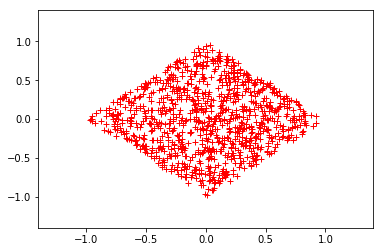

In [ ]:
PlotUnitNormBall(1)

p=2

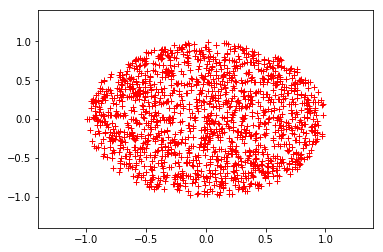

In [ ]:
PlotUnitNormBall(2)

p=inf

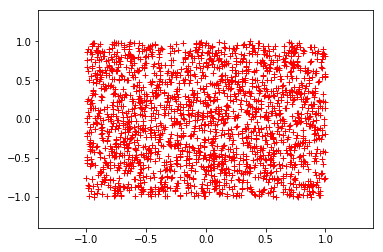

In [ ]:
PlotUnitNormBall(np.inf)

### Test with integer 0 < p < 1

p=0.6

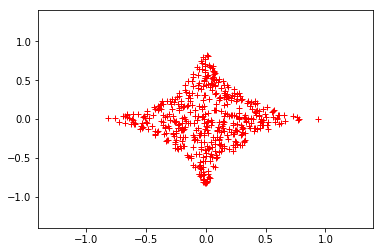

In [ ]:
PlotUnitNormBall(0.6)

# 1b

# 2

In [ ]:
import matplotlib.pyplot as plt
import random

In [ ]:
def function(p,q):
  if p>0 and p<=(1/3) :
    return 1
  elif p>(1/3) and p<=(1/3)*(1+(1/q)):
    return 1-(3*q*p-(q))
  elif p>(1/3)*(1+(1/q)) and p<=1:
    return 0


In [ ]:
import numpy as np
x=np.linspace(0, 1, 4000)

y=np.array([0])
for i in range(3999):
  m=function(x[i],5)  
  y= np.append(y,m)


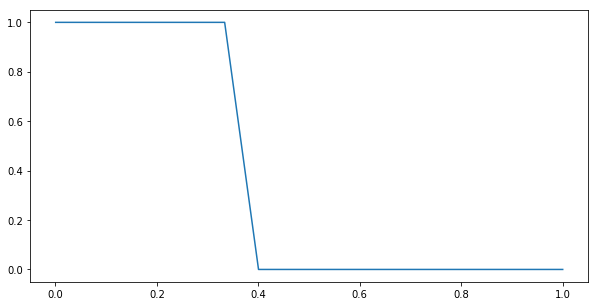

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(x, y)
plt.show()

# 3a

In [ ]:
import math

In [ ]:
def EntropyOfDiscreteRV(PMF):
    entropy = 0
    for i in range(len(PMF)):
        prop = PMF[i]
        if prop:
            entropy = entropy + (-prop * math.log2(prop))
    return entropy
    

PMF = [0.5, 0.25, 0.125, 0.0625,0.0625]                 
entropy = EntropyOfDiscreteRV(PMF)
print("entropy in bits: " + str(entropy))

entropy in bits: 1.875


# 3 b

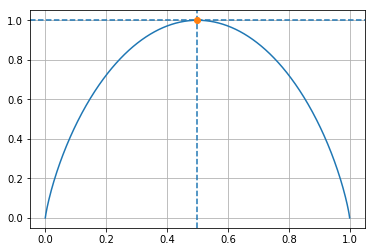

In [ ]:
p = np.linspace(0, 1, 500)
PMF = list()

for i in p:
    PMF.append([1-i, i])
    
entropy = list(map(EntropyOfDiscreteRV, PMF))
plt.plot(p, entropy)
plt.grid()
plt.axvline(x=0.5, linestyle='--')
plt.axhline(y=1, linestyle='--')
plt.plot(0.5,1, ls="", marker="o")
plt.show()

### This plot attain its maximum at p=0.5

# 4 a

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

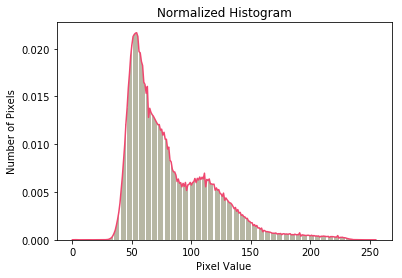

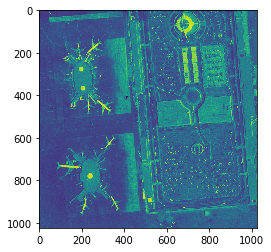

In [ ]:
def NormalizedHistogram(image):
    pixel_values = np.arange(256)
    count = np.zeros(256)
    n_pixels = 0
    for i in range(len(image)):
        for j in range(len(image[0])):
            count[image[i][j]] += 1
            n_pixels += 1
    count = count/n_pixels
    plt.title("Normalized Histogram")
    plt.plot(count, color='#ef476f')
    plt.bar(pixel_values, count,color='#b7b7a4')
    plt.ylabel('Number of Pixels')
    plt.xlabel('Pixel Value')
    plt.show()
    return count
img = mpimg.imread("5.3.02.tiff")
count = NormalizedHistogram(img)
plt.imshow(img)


# 4 b

## Observations:

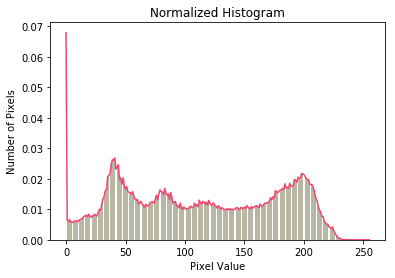

Entropy : 18.078293797425328


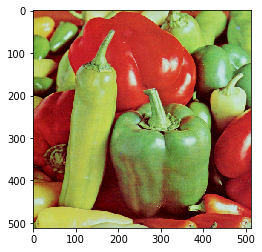

In [ ]:

img = mpimg.imread("4.2.07.tiff")
count = NormalizedHistogram(img)
entropy = EntropyOfDiscreteRV(count)
print( "Entropy :",entropy)
plt.imshow(img)

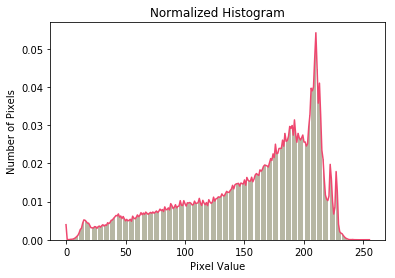

Entropy : 17.531682794778117


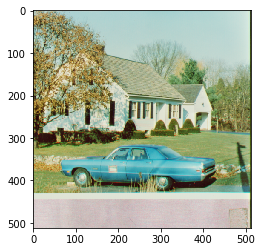

In [ ]:

img = mpimg.imread("house.tiff")
count = NormalizedHistogram(img)
entropy = EntropyOfDiscreteRV(count)
print( "Entropy :",entropy)
plt.imshow(img)

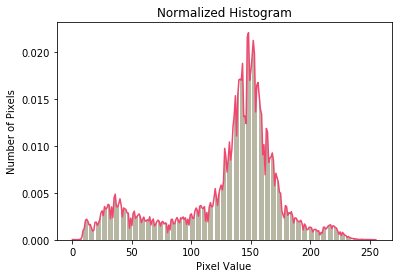

Entropy : 7.191370218069238


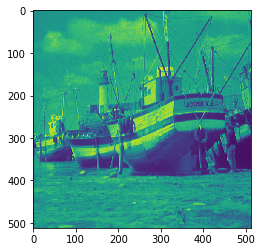

In [ ]:

img = mpimg.imread("boat.512.tiff")
count = NormalizedHistogram(img)
entropy = EntropyOfDiscreteRV(count)
print( "Entropy :",entropy)
plt.imshow(img)

# 5 a

In [ ]:
from PIL import Image
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

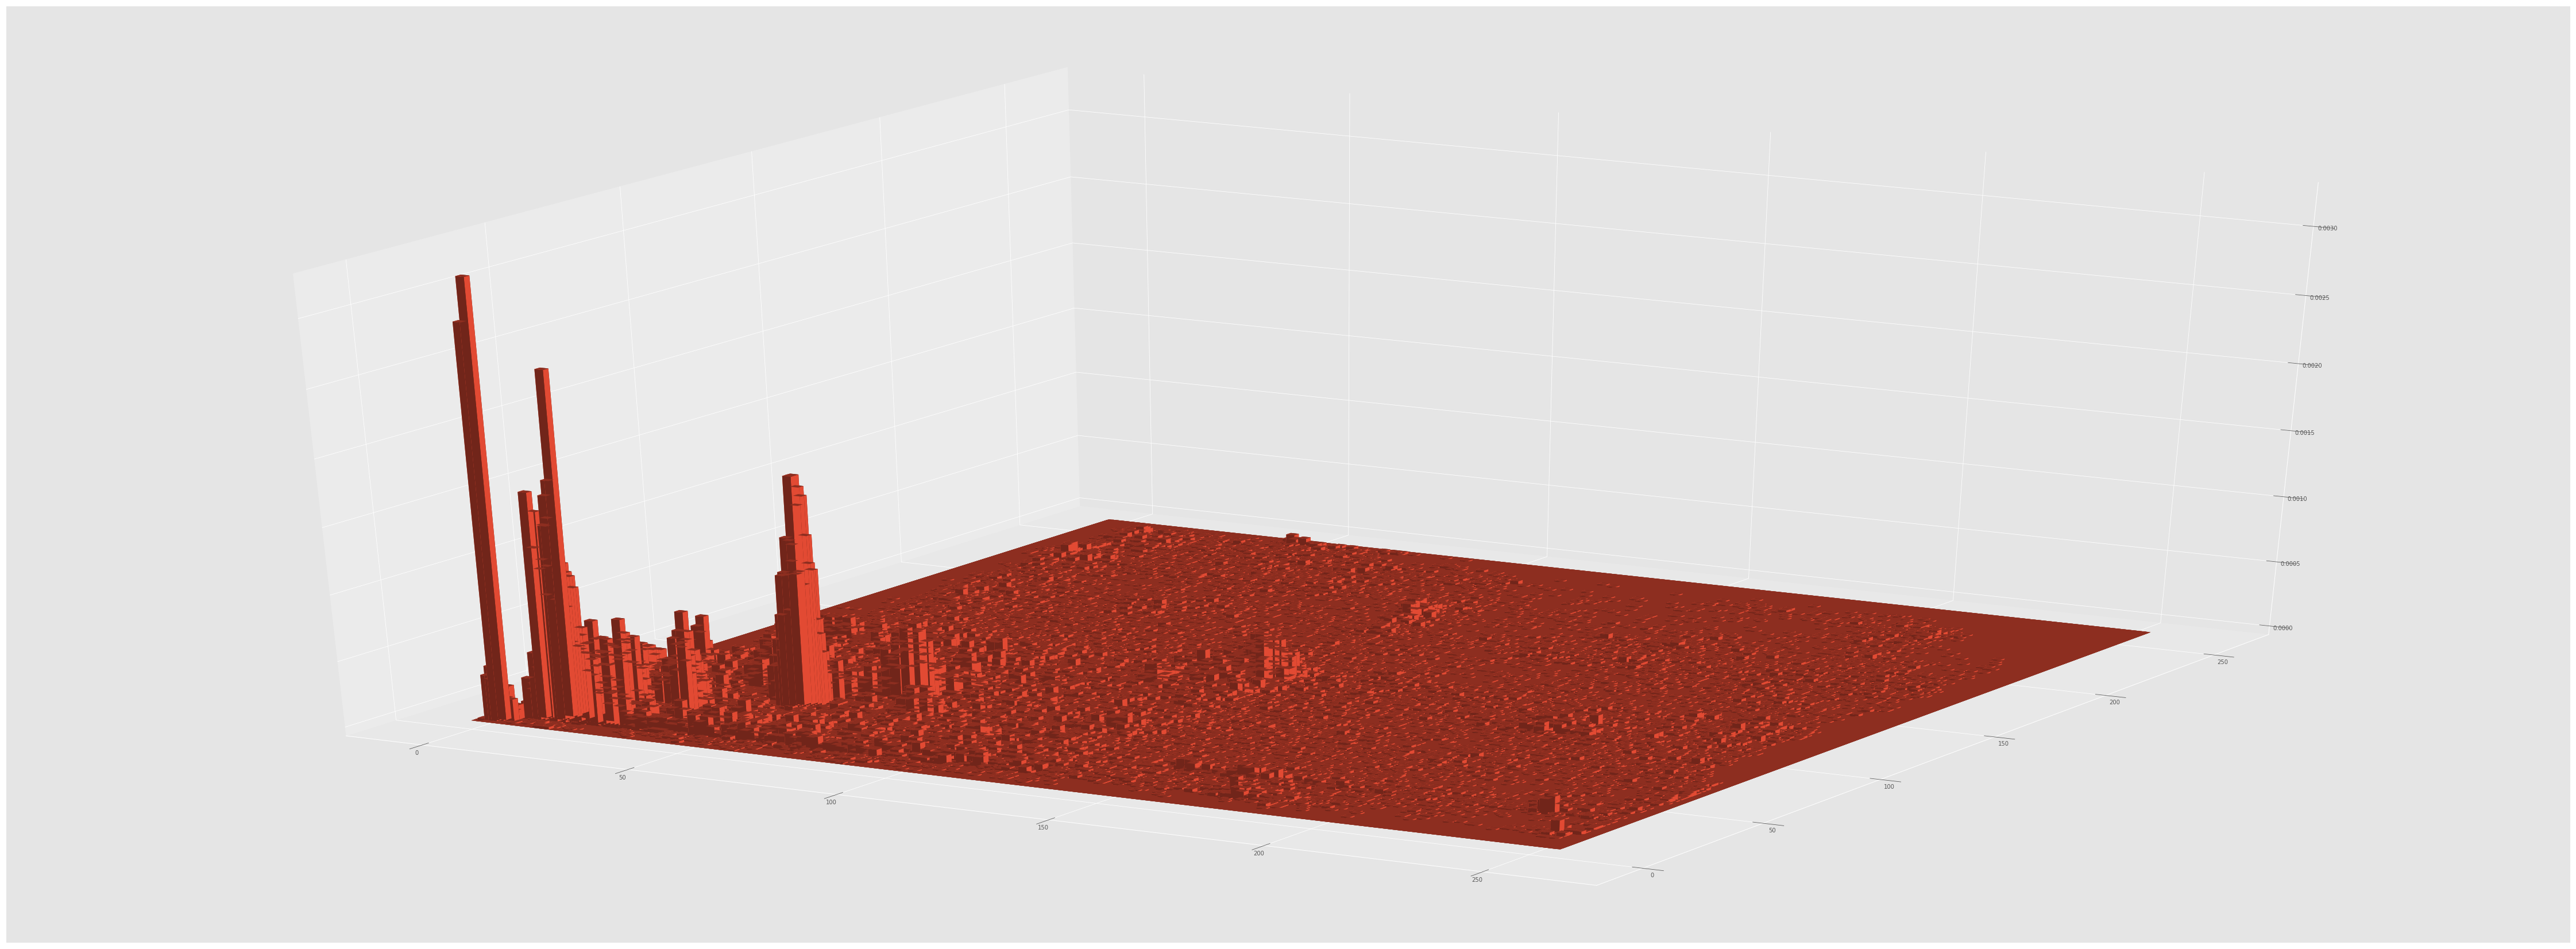

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.80844907e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.43605324e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
def joint_histogram(image1, image2):
    
    x = list()
    y = list()
    dz = list()
    count = np.zeros((256, 256))
    for i in range(np.shape(image1)[0]):
        for j in range(np.shape(image1)[1]):
            count[image1[i][j]][image2[i][j]] += 1
            
    count = count/(np.shape(image1)[0] * np.shape(image1)[1])
            
    for i in range(len(count)):
        for j in range(len(count[0])):
            x.append(i)
            y.append(j)
            dz.append(count[i][j])

    dx = [2] * 256 * 256
    dy = [2] * 256 * 256
    z = [0] * 256 * 256
    
    fig = plt.figure(figsize=(80, 30))
    ax = fig.add_subplot(111,projection='3d')
    ax.bar3d(x, y, z, dx, dy, dz) 
    plt.show()
    return count
    

image1 = Image.open('left.png')
image2 = Image.open('right.png')
joint_histogram(np.asarray(image1), np.asarray(image2))

# 5 b

In [ ]:
def jointEntropy(PMF):
    entropy = 0
    for i in range(len(PMF)):
        for j in range(len(PMF[0])):
            if PMF[i][j]:
                entropy = entropy +  (-PMF[i][j] * math.log2(PMF[i][j]))
    return entropy
    

PMF = np.array([[0.125, 0.0625, 0.3125, 0.3125],                    
               [0.0625, 0.0125, 0.3125, 0.3125],
               [0.0625, 0.0625, 0.0625, 0.0625],
               [0.25, 0, 0, 0]])                 
jointEntropy(PMF)


4.55161398257689

# 5 C

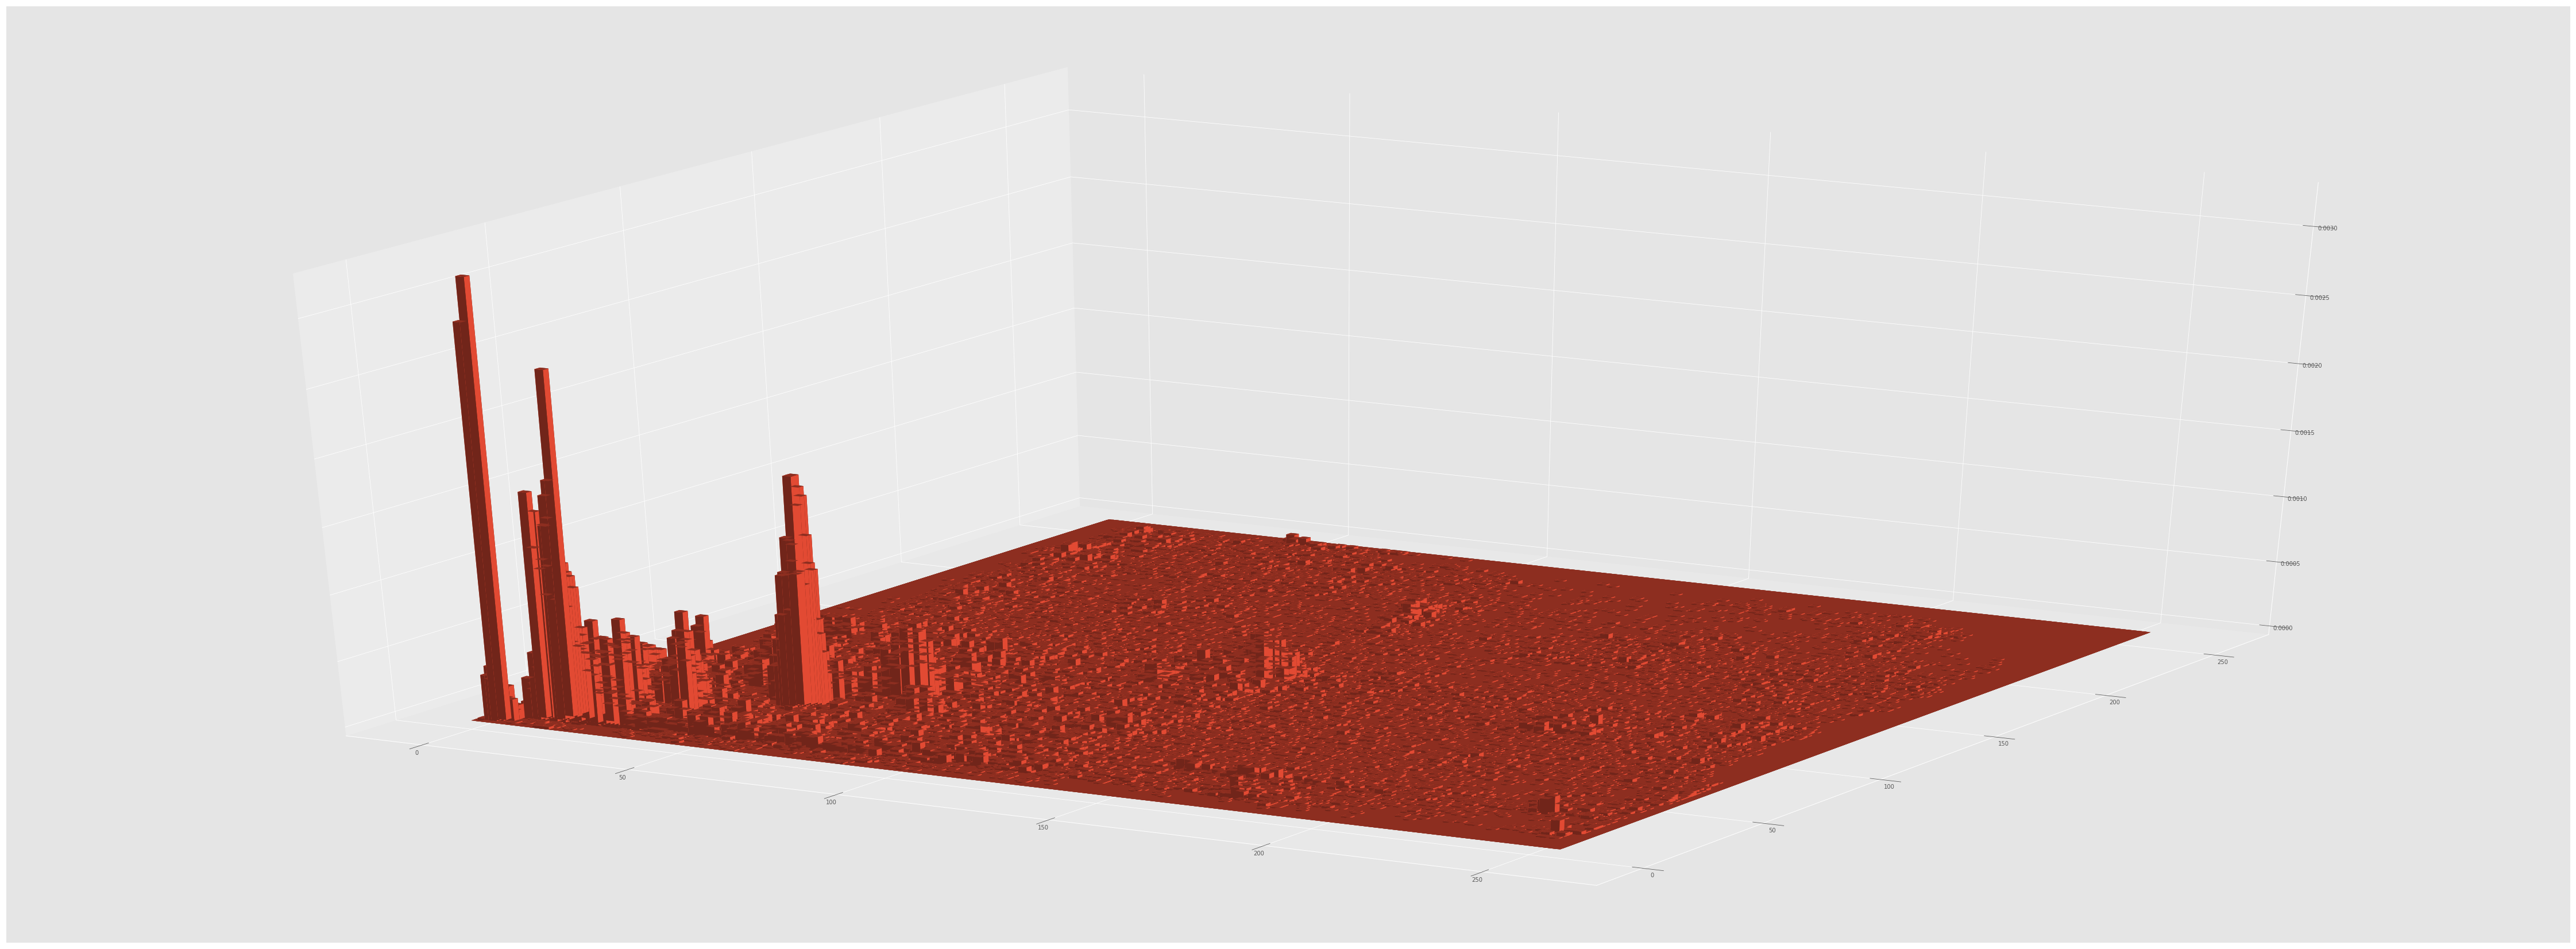

13.675203263376206

In [ ]:
pmf = joint_histogram(np.asarray(image1), np.asarray(image2))
jointEntropy(pmf)

# 6 A

In [ ]:
def Conditional_PMF(joint_pmf, index, value):
    if index == 0:
        x = joint_pmf[value, :]
        Conditional_PMF = x / joint_pmf[value, :].sum()
    elif index == 1:
        x = joint_pmf[:, value]
        Conditional_PMF = x / joint_pmf[:, value].sum()
    return Conditional_PMF
    
joint_pmf = np.array([[1/8, 1/16, 1/32, 1/32],                    
               [1/16, 1/8, 1/32, 1/32],
               [1/16, 1/16, 1/16, 1/16],
               [1/4, 0, 0, 0]])          
index = 1                                   
value = 1
Conditional_PMF(joint_pmf, index, value)

array([0.25, 0.5 , 0.25, 0.  ])

# 6 b

In [ ]:
def ConditionalEntropy(joint_pmf, index):
    
    conditional_entropy = 0
    
    for i in range(len(joint_pmf)):                           # loop over Y
        for j in range(len(joint_pmf[0])):                    # loop over X
            if index == 0:
                conditional_probability = Conditional_PMF(joint_pmf, index, i)[j]
            elif index == 1:
                conditional_probability = Conditional_PMF(joint_pmf, index, j)[i]
                
            if conditional_probability:
                conditional_entropy += joint_pmf[i][j] * math.log2(1/conditional_probability)
                
    return conditional_entropy

joint_pmf = np.array([[1/8, 1/16, 1/32, 1/32],                    
               [1/16, 1/8, 1/32, 1/32],
               [1/16, 1/16, 1/16, 1/16],
               [1/4, 0, 0, 0]])
index = 0
ConditionalEntropy(joint_pmf, index)

1.375

# 6 C

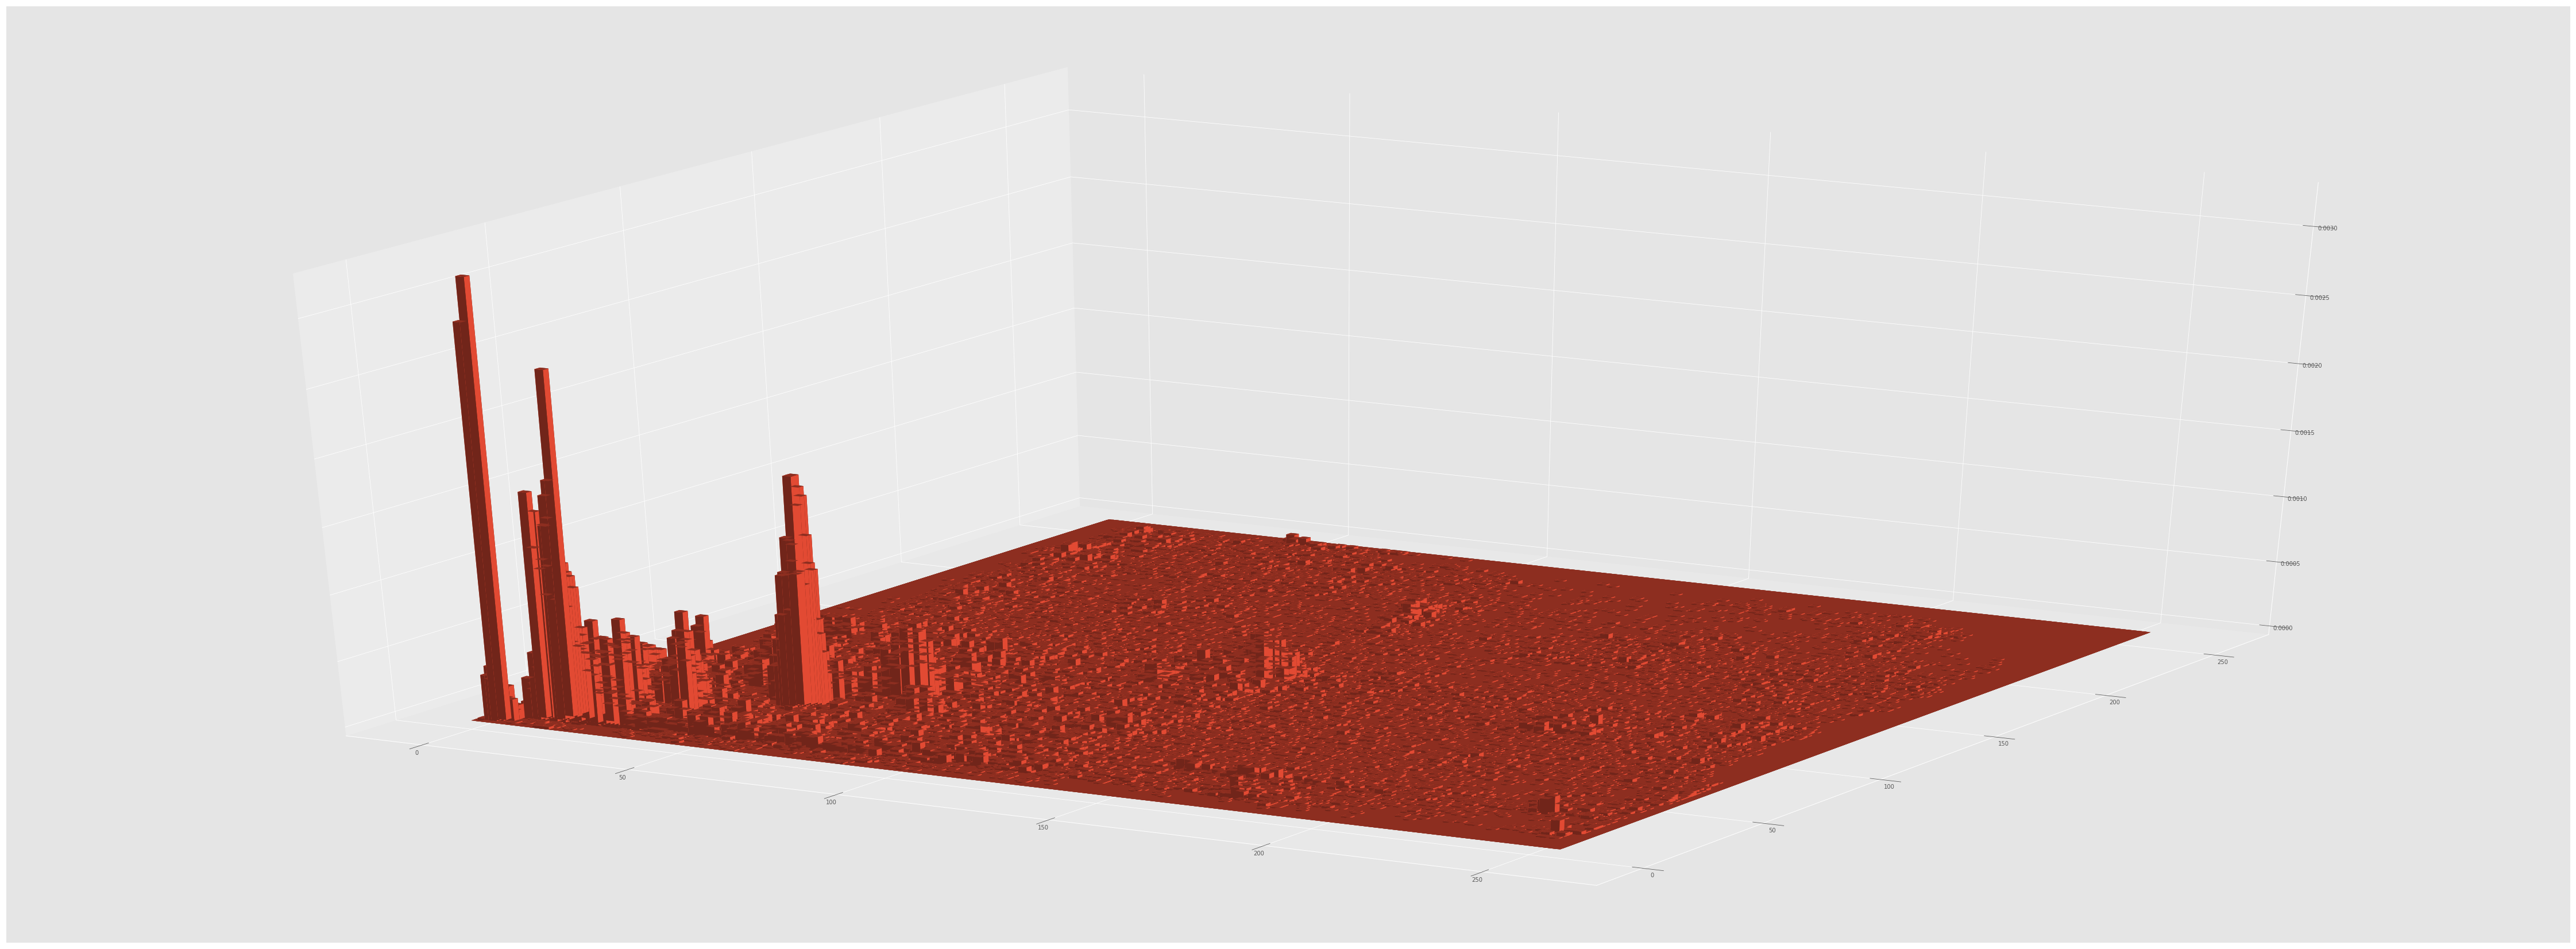

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.80844907e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.43605324e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


C:\Users\M S SUNAMDHA HARINHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


nan

In [ ]:
joint_pmf = joint_histogram(np.asarray(image1), np.asarray(image2))
print(joint_pmf)
Index = 1
ConditionalEntropy(joint_pmf, Index)

# 7 a

In [ ]:
def KL_divergence(p, q):
    if np.all(q):
        kl_divergence = 0
        for i in range(len(p)):
            kl_divergence += p[i] * math.log2(p[i]/q[i])
        return kl_divergence
    else:
        return "Distribution in the denominator has zero values"
p = [0.8, 0.2]
q = [0.7, 0.3] 

print("D(p||q): " + str(KL_divergence(np.asarray(p), np.asarray(q))))

D(p||q): 0.03712356220968567


# 7 b

### i. Plot D(p||q), D(q||p).

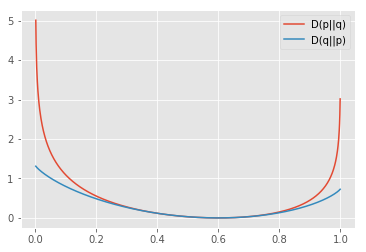

In [ ]:
r = 0.6    #value of r is fixed                                       

p = [1-r, r]

s = np.linspace(0, 1, 1000)
s = s[1:len(s)-1]
D_pq = list()
D_qp = list()
for val in s:
    D_pq.append(KL_divergence(p, [1-val, val]))
    D_qp.append(KL_divergence([1-val, val], p))
plt.plot(s, D_pq, label="D(p||q)")
plt.plot(s, D_qp, label="D(q||p)")
plt.legend()
plt.show()

### ii. Verify that D(p||q), D(q||p) are indeed non-negative.

### iii. Verify that D(p||q) != D(q||p) and are both equal to zero only when r = s.

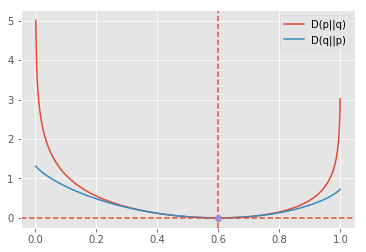

In [ ]:
plt.plot(s, D_pq, label="D(p||q)")
plt.plot(s, D_qp, label="D(q||p)")
plt.axhline(y=0, linestyle='--')
plt.axvline(x=r, linestyle='--')
plt.plot(r, 0, ls="", marker="o")
plt.legend()
plt.show()

## 7 b iv

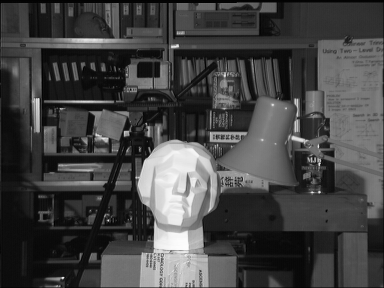

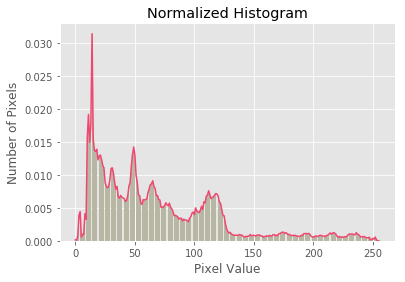

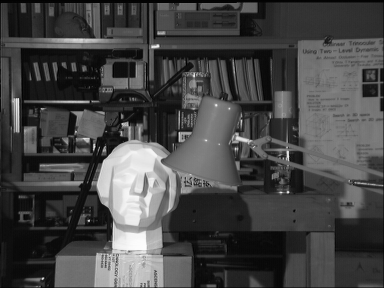

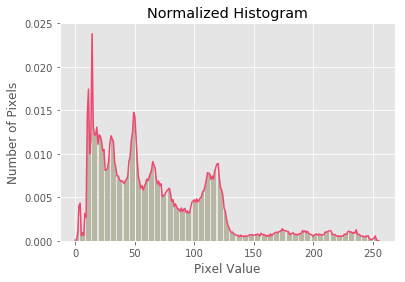

D(p||q): Distribution in the denominator has zero values
D(q||p): Distribution in the denominator has zero values


In [ ]:
image1 = Image.open('left.png'); 
display(image1)
p = NormalizedHistogram(np.asarray(image1))

image2 = Image.open('right.png'); 
display(image2)
q = NormalizedHistogram(np.asarray(image2))

D_pq = KL_divergence(p, q)
D_qp = KL_divergence(q, p)

print("D(p||q): " + str(D_pq))
print("D(q||p): " + str(D_qp))